In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
salary=pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


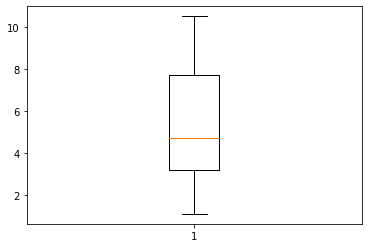

In [6]:
plt.boxplot(salary.YearsExperience)
salary.describe()

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

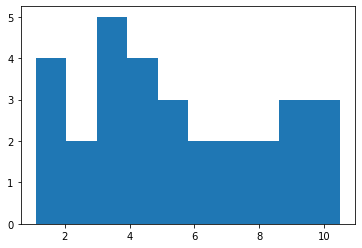

In [7]:
plt.hist(salary.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x19d7cd04b50>,
 'caps': [<matplotlib.lines.Line2D at 0x19d7cd11250>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d7cd047c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19d7cd11910>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d7cd11c70>],
 'means': []}

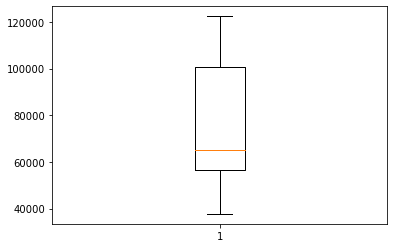

In [8]:
plt.boxplot(salary.Salary)

Text(0, 0.5, 'Salary')

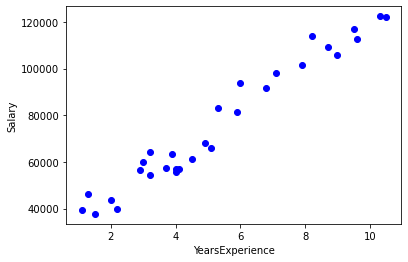

In [9]:
plt.plot (salary.YearsExperience,salary.Salary,"bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [10]:
salary.Salary.corr(salary.YearsExperience)

0.9782416184887598

In [11]:
import statsmodels.formula.api as smf
model= smf.ols("Salary~YearsExperience",data=salary).fit()

In [12]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        21:20:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
prd=model.predict(salary.iloc[:,0])

In [15]:
model.resid
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [16]:
rmse_lin=np.sqrt(np.mean((np.array(salary['Salary'])-np.array(prd))**2))
rmse_lin

5592.043608760662

Text(0, 0.5, 'Salary')

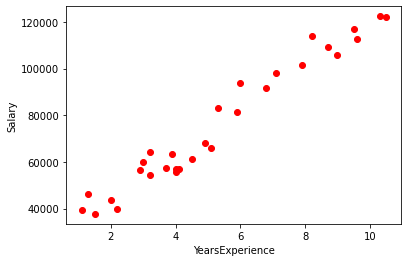

In [25]:
import matplotlib.pylab as plt
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")